# IMPORTS

In [1]:
import pandas as pd
pd.set_option('display.max_columns',0)

In [2]:
import numpy as np

In [55]:
import matplotlib.pyplot as plt
import matplotlib as mpl

In [42]:
from jupyterthemes import jtplot
### OG plot
# jtplot.reset() 
jtplot.style(theme='monokai', context='notebook', ticks='True', grid='True') 

In [3]:
def melt_data(df):
    """
    Reshapes long form dataset to wide format.
    _________________________________________________________________________
    Predefined function.
    defaults:
        id_vars=['RegionID', 'SizeRank', 'RegionName', 'City', 'State',
                 'Metro', 'CountyName','ROI_10yr','ROI_5yr','ROI_3yr']
        var_name='date'
    
    Parameters:
    ===========
    df = pandas.DataFrame; No default.
    
    --version 0.0.2--
    """
    melted = pd.melt(df,
                     id_vars=[
                         'RegionID', 'SizeRank', 'RegionName', 'City', 'State',
                         'Metro', 'CountyName','ROI_10yr','ROI_5yr','ROI_3yr'
                     ],
                     var_name='date')
    melted['date'] = pd.to_datetime(melted['date'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

In [4]:
def return_on_investment(df, start_date, end_date):
    """
    The logarithmic return or continuously compounded return, also known as force of interest.
    
    Parameters:
    ===========
    df = pandas.DataFrame; No default.
    start_date = str, date in year-month format; No default.
    end_date = str, date in year-month format; No default.
    
    """
    return np.log(df[end_date] / df[start_date])

# DATA

In [5]:
# leading data
df = pd.read_csv('./zillow_data.csv')

In [6]:
# display dataset
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,...,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,...,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,...,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,114700,115000,115000,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,.

In [7]:
# information
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,...,893000,895000,901200,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,...,251400,253000,255200,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,301700,302400,303600,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,...,1176400,1174600,1178500,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,114700,115000,115000,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [9]:
# column expaliner

In [10]:
# make dynamic programmatically
# StartDATE, 10y, 5y, 3y

In [11]:
# ROI
# 10 year
df['ROI_10yr'] = return_on_investment(df, '2008-04', '2018-04')
# 5 year
df['ROI_5yr'] = return_on_investment(df, '2013-04', '2018-04')
# 3 year
df['ROI_3yr'] = return_on_investment(df, '2015-04', '2018-04')
# dataset
df

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,337600.0,338500.0,339500.0,340400.0,341300.0,342600.0,344400.0,345700.0,346700.0,347800.0,349000.0,350400.0,352000.0,353900.0,356200.0,358800.0,361800.0,365700.0,370200.0,374700.0,378900.0,383500.0,388300.0,393300.0,398500.0,403800.0,409100.0,414600.0,420100.0,426200.0,...,909400,915000,916700,917700,919800,925800,937100,948200,951000,952500,958600,966200,970400,973900,974700,972600,974300,980800,988000,994700,998700,997000,993700,991300,989200,991300,999100,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600,0.175051,0.231768,0.125111
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,235400.0,233300.0,230600.0,227300.0,223400.0,219600.0,215800.0,211100.0,205700.0,200900.0,196800.0,193600.0,191400.0,190400.0,190800.0,192700.0,196000.0,201300.0,207400.0,212200.0,214600.0,215100.0,213400.0,210200.0,206100.0,202100.0,198800.0,196100.0,194100.0,193400.0,...,258000,261200,264700,268400,271400,273600,275200,276400,277000,277900,280000,282600,285400,288400,290800,292000,292800,293700,295200,297000,299000,300800,301800,302800,304400,306200,307000,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800,0.421125,0.427776,0.220971
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,210700.0,208300.0,205500.0,202500.0,199800.0,198300.0,197300.0,195400.0,193000.0,191800.0,191800.0,193000.0,195200.0,198400.0,202800.0,208000.0,213800.0,220700.0,227500.0,231800.0,233400.0,233900.0,233500.0,233300.0,234300.0,237400.0,242800.0,250200.0,258600.0,268000.0,...,306200,309100,311900,314100,316300,319000,322000,324300,326100,327300,327000,327200,328500,329800,330000,329000,327800,326700,325500,324700,324500,323700,322300,320700,320000,320000,320900,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900,0.279331,0.249324,0.074551
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,504600.0,505500.0,505700.0,505300.0,504200.0,503600.0,503400.0,502200.0,500000.0,497900.0,496300.0,495200.0,494700.0,494900.0,496200.0,498600.0,502000.0,507600.0,514900.0,522200.0,529500.0,537900.0,546900.0,556400.0,566100.0,575600.0,584800.0,593500.0,601600.0,610100.0,...,1185700,1192900,1198800,1200400,1198900,1200200,1207400,1218600,1226600,1230700,1235400,1241300,1245700,1247000,1246700,1245700,1246000,1247700,1252900,1260900,1267900,1272600,1276600,1280300,1282500,1286000,1289000,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000,0.133116,0.230150,0.097401
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,77300.0,77400.0,77500.0,77600.0,77700.0,77700.0,77800.0,77900.0,77900.0,77800.0,77800.0,77800.0,77800.0,77800.0,77900.0,78100.0,78200.0,78400.0,78600.0,78800.0,79000.0,79100.0,79200.0,79300.0,79300.0,79300.0,79400.0,79500.0,79500.0,79600.0,...,115200,115600,115900,115600,115400,115400,115500,115800,116300,116200,115600,115000,114500,114200,114000,114000,113900,114100,114900,115700,116300,116900,117300,117600,118000,118600,118900,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500,-0.054457,0.068111,0.053245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [12]:
df[df['ROI_10yr'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
36,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,286300,289900,291800,291900,291900,292600,293300,295300,299500,304900,305200,304400,303200,302600,300900,302900,306400,312300,319800,327600,333600,339900,346300,350600,354000,356700,357600,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400,NaN,NaN,0.320325
105,84613,60611,Chicago,IL,Chicago,Cook,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1381100,1386900,1378400,1353600,1331200,1326800,1337000,1348700,1353600,1352300,1353300,1350200,1342000,1337700,1336200,1338300,1347900,1369100,1400700,1431400,1448800,1453100,1455500,1459600,1461300,1458300,1465800,1475200,1473900,1469500,1472100,1477800,1486000,1497300,1508600,1508100,1493200,NaN,NaN,0.078041
469,87563,67401,Salina,KS,Salina,Saline,470,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,105400,105800,106100,106000,105400,105000,105000,105200,105200,105500,106200,107800,109200,109900,109700,109300,109300,110000,110400,110300,110200,110500,111300,113200,114900,115700,115900,115800,115700,115600,115600,115600,115500,115500,115500,115400,115400,NaN,0.277909,0.090642
713,73596,35758,Madison,AL,Huntsville,Madison,714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,202400,202600,201500,199800,198600,198200,199200,200100,201000,202300,204300,206400,208200,207800,205800,204300,204700,205700,207300,208200,209500,211200,213500,215000,216000,215400,213600,212000,211700,212500,214100,215300,216100,217700,221000,224700,227500,NaN,0.210043,0.116904
842,70817,30032,Candler-Mcafee,GA,Atlanta,Dekalb,843,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,66500,68200,70500,72800,74900,75900,77000,78100,78900,79500,80100,81400,84400,87400,89100,90300,90600,90700,91200,91100,91100,92000,93400,94800,96400,98500,100300,103300,107700,111700,114600,118300,122300,125400,128600,132800,135900,NaN,NaN,0.714717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14669,82632,56120,Butterfield,MN,NaN,Watonwan,14670,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,90400,91100,90800,90000,89500,89300,88600,88200,88300,88000,87500,87200,87900,88700,89400,90000,91100,92300,94400,97300,100700,104000,107500,111600,115700,119600,123300,126300,129000,132400,135800,136000,132600,131100,132900,133900,133600,NaN,0.477215,0.390606
14674,94662,84726,Escalante,UT,NaN,Garfield,14675,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,154500,155300,155200,154900,155500,157200,158900,159400,159600,160100,161

In [13]:
## selecting NY zipcodes
df_ny = df.loc[df['State'] == 'NY'].reset_index()
df_ny.drop(['index'], axis=1, inplace=True)
df_ny

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
0,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,152300.0,152000.0,151800.0,151600.0,151600.0,151700.0,151800.0,151800.0,151900.0,152000.0,152200.0,152400.0,152500.0,152600.0,152700.0,152900.0,153200.0,153800.0,154300.0,154700.0,155200.0,155700.0,156400.0,157000.0,157600.0,158100.0,158600.0,159200.0,160000.0,...,349400,352500,356500,359400,361200,362900,364000,367100,370800,370700,367600,365800,367200,372200,377300,378000,378300,381100,385400,386000,385300,387300,391300,394200,394500,392500,391200,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900,0.048037,0.292560,0.179025
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,163000.0,163400.0,164000.0,164700.0,165700.0,166800.0,167900.0,168800.0,169600.0,170400.0,171100.0,171800.0,172600.0,173600.0,174700.0,176000.0,177400.0,179100.0,180700.0,182000.0,183100.0,184100.0,185000.0,185900.0,186800.0,187900.0,189100.0,190400.0,192000.0,193800.0,...,688300,695500,699300,702500,709600,711600,711900,710800,714000,724500,744400,753100,759600,773100,787200,795500,802700,811600,815600,828100,853300,875200,876100,877600,872600,866300,862600,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200,0.456802,0.604960,0.336036
2,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,251200.0,251100.0,251000.0,251000.0,251200.0,251700.0,252100.0,252200.0,252500.0,253100.0,254200.0,255800.0,257600.0,259500.0,261300.0,263000.0,264800.0,266700.0,268300.0,269600.0,270800.0,272400.0,274700.0,277600.0,280900.0,284400.0,287900.0,291200.0,294600.0,298000.0,...,855600,861500,867700,873900,878700,880900,882200,884300,884000,884900,893000,903700,907800,907300,912100,921600,931500,938500,945200,953500,964900,975500,983600,990400,998200,1007300,1015200,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,0.454742,0.407080,0.237164
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,192000.0,192500.0,193000.0,193600.0,194300.0,195300.0,196300.0,197200.0,197800.0,198400.0,199000.0,199700.0,200400.0,201300.0,202200.0,203300.0,204500.0,206100.0,208000.0,209600.0,211000.0,212500.0,214000.0,215600.0,217200.0,218900.0,220700.0,222600.0,224700.0,227200.0,...,625800,636200,641500,644100,650400,656100,656900,656100,658300,663600,669800,674900,678800,677100,673400,675000,682700,688100,691400,699000,708900,715900,724100,734800,743100,751000,758800,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200,0.362538,0.411610,0.265629
4,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10572500,10569500,10674900,10848100,11131200,11342700,11378800,11255300,11248600,11286600,11395300,11498100,11574100,11618900,11681200,11701600,11733900,11764800,11830000,11932900,12000400,11998800,12013400,12028600,11993400,11969900,12053100,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300,0.691276,0.378125,0.082202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [14]:
# Metro in NY
df_ny.Metro.unique()

array(['New York', 'Ithaca', 'Buffalo', 'Rochester', 'Albany',
       'Binghamton', 'Auburn', 'Watertown', 'Utica', 'Jamestown',
       'Kingston', 'Plattsburgh', 'Syracuse', 'Glens Falls', 'Cortland',
       'Elmira', 'Corning', 'Olean', 'Oneonta', 'Hudson', 'Ogdensburg',
       nan], dtype=object)

In [15]:
df_ny[df_ny.Metro.isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
328,63314,13815,Norwich,NY,NaN,Chenango,6939,57700.0,57000.0,56400.0,55800.0,55200.0,54700.0,54200.0,53800.0,53300.0,52800.0,52400.0,52000.0,51700.0,51400.0,51200.0,51100.0,51000.0,51000.0,51000.0,51000.0,50900.0,50900.0,50900.0,50900.0,51000.0,51000.0,51100.0,51300.0,51500.0,51800.0,52100.0,52300.0,52500.0,...,83600,84000,84700,84500,83600,82700,82300,81700,81400,81700,82200,82300,82500,82900,83200,83400,83500,83400,83500,83800,84100,85200,86600,87400,87800,88600,89300,89500,89200,88800,88700,88600,89200,90000,90500,90500,90700,-0.018570,0.033635,0.081514
387,62544,12414,Catskill,NY,NaN,Greene,7786,68700.0,68500.0,68300.0,68100.0,67900.0,67700.0,67500.0,67300.0,67100.0,67100.0,67000.0,66900.0,66800.0,66700.0,66700.0,66700.0,66800.0,66900.0,67000.0,67200.0,67400.0,67700.0,67900.0,68100.0,68300.0,68500.0,68600.0,68700.0,68800.0,68900.0,68900.0,69000.0,69000.0,...,140500,141200,142500,143400,143500,143400,143900,144400,144700,145200,146100,146500,146700,146800,146900,147100,147800,148700,149000,148600,147800,147300,147400,147700,148100,148700,149000,149200,149700,149900,150100,151000,152400,153300,153900,154300,154300,-0.046844,0.118188,0.093691
417,63815,14895,Wellsville,NY,NaN,Allegany,8280,42900.0,42800.0,42700.0,42700.0,42600.0,42600.0,42700.0,42700.0,42600.0,42600.0,42600.0,42600.0,42500.0,42500.0,42600.0,42600.0,42700.0,42800.0,42800.0,42900.0,43000.0,43100.0,43100.0,43200.0,43200.0,43300.0,43300.0,43400.0,43400.0,43500.0,43600.0,43700.0,43700.0,...,55900,56200,56300,56600,56700,56700,56600,56500,56600,56900,57100,57300,57600,57700,57600,57800,58000,58000,58100,58300,58200,58100,58100,58200,58200,58400,58700,59000,59100,59000,59200,59900,60500,60900,61300,61900,62400,0.159507,0.081780,0.110001
490,63339,13856,Walton,NY,NaN,Delaware,9254,55900.0,55900.0,55900.0,55900.0,55900.0,55900.0,55900.0,55900.0,55800.0,55900.0,55900.0,55800.0,55800.0,55800.0,55800.0,55700.0,55700.0,55700.0,55700.0,55800.0,55900.0,56000.0,56200.0,56400.0,56600.0,56800.0,57000.0,57200.0,57500.0,57800.0,58200.0,58500.0,58900.0,...,103200,103700,103700,103100,102600,102700,102500,102100,102200,102500,102700,103400,104300,104600,104400,104700,105000,104900,105000,105300,105300,105700,106600,107100,107600,108200,108600,108600,108700,108700,108600,108900,109700,110300,110000,110500,111900,-0.049683,0.130599,0.080937
550,62698,12721,Mamakating,NY,NaN,Sullivan,10016,119000.0,118800.0,118400.0,118100.0,117700.0,117300.0,116900.0,116500.0,116200.0,115900.0,115600.0,115200.0,114700.0,114200.0,113700.0,113200.0,112700.0,112400.0,112000.0,111700.0,111600.0,111700.0,111900.0,112100.0,112400.0,112800.0,113300.0,113800.0,114400.0,115100.0,115800.0,116500.0,117400.0,...,199800,201400,203100,204600,205100,204800,204300,204700,202800,197800,192600,191300,192500,194300,194500,195500,198100,201300,203000,201900,200000,198800,199300,202300,205600,206900,207400,208100,208000,207300,206600,206800,208000,209700,211000,207100,200700,-0.313504,0.055314,0.004494
561,62753,12790,Mamakating,NY,NaN,Sullivan,10137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,139700,141200,142000,142400,142300,142500,142400,142900,140400,133700,125500,120500,118500,118700,119000,120700,122700,123600,123200,122200,121900,122900,125100,128700,132500,134700,135700,136000,135700,13

In [16]:
df_ny['Metro'] = df_ny['Metro'].fillna('Non_Metro')
print('Misssing: ', len(df_ny[df_ny.Metro.isna()]))
print('Regions: ', df_ny.Metro.unique())
df_ny

Misssing:  0
Regions:  ['New York' 'Ithaca' 'Buffalo' 'Rochester' 'Albany' 'Binghamton' 'Auburn'
 'Watertown' 'Utica' 'Jamestown' 'Kingston' 'Plattsburgh' 'Syracuse'
 'Glens Falls' 'Cortland' 'Elmira' 'Corning' 'Olean' 'Oneonta' 'Hudson'
 'Ogdensburg' 'Non_Metro']


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
0,61807,10467,New York,NY,New York,Bronx,7,152900.0,152700.0,152600.0,152400.0,152300.0,152000.0,151800.0,151600.0,151600.0,151700.0,151800.0,151800.0,151900.0,152000.0,152200.0,152400.0,152500.0,152600.0,152700.0,152900.0,153200.0,153800.0,154300.0,154700.0,155200.0,155700.0,156400.0,157000.0,157600.0,158100.0,158600.0,159200.0,160000.0,...,349400,352500,356500,359400,361200,362900,364000,367100,370800,370700,367600,365800,367200,372200,377300,378000,378300,381100,385400,386000,385300,387300,391300,394200,394500,392500,391200,394400,400000,407300,411600,413200,414300,413900,411400,413200,417900,0.048037,0.292560,0.179025
1,62037,11226,New York,NY,New York,Kings,11,162000.0,162300.0,162600.0,163000.0,163400.0,164000.0,164700.0,165700.0,166800.0,167900.0,168800.0,169600.0,170400.0,171100.0,171800.0,172600.0,173600.0,174700.0,176000.0,177400.0,179100.0,180700.0,182000.0,183100.0,184100.0,185000.0,185900.0,186800.0,187900.0,189100.0,190400.0,192000.0,193800.0,...,688300,695500,699300,702500,709600,711600,711900,710800,714000,724500,744400,753100,759600,773100,787200,795500,802700,811600,815600,828100,853300,875200,876100,877600,872600,866300,862600,860200,851000,853900,870000,885100,887800,890500,901700,930700,963200,0.456802,0.604960,0.336036
2,62087,11375,New York,NY,New York,Queens,13,252400.0,251800.0,251400.0,251200.0,251100.0,251000.0,251000.0,251200.0,251700.0,252100.0,252200.0,252500.0,253100.0,254200.0,255800.0,257600.0,259500.0,261300.0,263000.0,264800.0,266700.0,268300.0,269600.0,270800.0,272400.0,274700.0,277600.0,280900.0,284400.0,287900.0,291200.0,294600.0,298000.0,...,855600,861500,867700,873900,878700,880900,882200,884300,884000,884900,893000,903700,907800,907300,912100,921600,931500,938500,945200,953500,964900,975500,983600,990400,998200,1007300,1015200,1022600,1033700,1048600,1066400,1081200,1088800,1092700,1089500,1084000,1084600,0.454742,0.407080,0.237164
3,62045,11235,New York,NY,New York,Kings,14,190500.0,191000.0,191500.0,192000.0,192500.0,193000.0,193600.0,194300.0,195300.0,196300.0,197200.0,197800.0,198400.0,199000.0,199700.0,200400.0,201300.0,202200.0,203300.0,204500.0,206100.0,208000.0,209600.0,211000.0,212500.0,214000.0,215600.0,217200.0,218900.0,220700.0,222600.0,224700.0,227200.0,...,625800,636200,641500,644100,650400,656100,656900,656100,658300,663600,669800,674900,678800,677100,673400,675000,682700,688100,691400,699000,708900,715900,724100,734800,743100,751000,758800,767300,777300,788800,793900,796000,799700,806600,810600,813400,816200,0.362538,0.411610,0.265629
4,61625,10011,New York,NY,New York,New York,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,10572500,10569500,10674900,10848100,11131200,11342700,11378800,11255300,11248600,11286600,11395300,11498100,11574100,11618900,11681200,11701600,11733900,11764800,11830000,11932900,12000400,11998800,12013400,12028600,11993400,11969900,12053100,12137600,12112600,12036600,12050100,12016300,11946500,11978100,11849300,11563000,11478300,0.691276,0.378125,0.082202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [17]:
df_ny[df_ny['ROI_10yr'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
7,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,286300,289900,291800,291900,291900,292600,293300,295300,299500,304900,305200,304400,303200,302600,300900,302900,306400,312300,319800,327600,333600,339900,346300,350600,354000,356700,357600,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400,NaN,NaN,0.320325
75,62004,11101,New York,NY,New York,Queens,1300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,673500,681900,682700,684500,685200,692600,702600,701800,699600,713000,725800,729600,736300,750000,762000,765000,761900,764900,773800,781200,782400,779900,773900,765500,761100,763800,767200,760100,739000,708300,698500,711200,742900,767300,769700,767200,782500,NaN,0.480202,0.150006
124,61857,10550,Mount Vernon,NY,New York,Westchester,2730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,294200,295500,294400,292000,290900,293100,297200,299800,299000,296900,299400,301600,301100,299500,302100,306700,308800,307200,305000,301000,295900,292600,287300,281400,278900,281800,286000,288100,289500,292200,295200,297600,299600,301600,304300,305000,304800,NaN,0.250331,0.035396
357,63458,14201,Buffalo,NY,Buffalo,Erie,7305,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,150400,151100,152300,153100,153700,156700,160900,163400,164700,166600,167500,169500,171900,176000,179900,182900,183700,184400,184700,184700,185800,187000,186400,183800,184000,184500,182700,181800,186000,192100,197400,201000,202200,201700,203600,206500,207000,NaN,0.496437,0.319420
517,62555,12428,Wawarsing,NY,Kingston,Ulster,9592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120400,119900,119600,119800,120600,120400,118600,116500,115400,115900,116100,114900,114000,113600,112300,111200,110700,110300,110000,110500,112000,113700,114800,115300,116100,116900,117800,119000,120700,123200,125900,127100,127600,128200,128200,127100,126700,NaN,NaN,0.051003
768,63171,13607,Alexandria,NY,Watertown,Jefferson,12547,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,91000,91100,90700,91100,92600,94700,96800,97900,98000,98100,97800,96900,96100,96200,96800,96400,94000,92000,90800,90600,91800,94100,96300,99700,104300,106100,105000,104000,105100,105100,105300,105500,104700,102900,102500,102000,101200,NaN,-0.005911,0.106239
769,62419,12138,Petersburg,NY,Albany,Rensselaer,12566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,152500,149500,145700,141900,139100,137000,135400,133600,131300,129800,130300,131800,133200,136000,139300,142600,145600,148800,151300,153200,154800,157000,158600,157500,155400,153500,152100,151300,151200,149900,148800,149000,150700,152000,152400,153000,154000,NaN,0.054717,0.009788
791,62582,12458,Wawarsing,NY,Kingston,Ulster,12727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [18]:
df_ny[df_ny['ROI_5yr'].isna()]

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,ROI_10yr,ROI_5yr,ROI_3yr
7,61796,10456,New York,NY,New York,Bronx,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,286300,289900,291800,291900,291900,292600,293300,295300,299500,304900,305200,304400,303200,302600,300900,302900,306400,312300,319800,327600,333600,339900,346300,350600,354000,356700,357600,357900,357100,356500,357200,362000,368500,374100,379800,388100,394400,NaN,NaN,0.320325
517,62555,12428,Wawarsing,NY,Kingston,Ulster,9592,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,120400,119900,119600,119800,120600,120400,118600,116500,115400,115900,116100,114900,114000,113600,112300,111200,110700,110300,110000,110500,112000,113700,114800,115300,116100,116900,117800,119000,120700,123200,125900,127100,127600,128200,128200,127100,126700,NaN,NaN,0.051003
791,62582,12458,Wawarsing,NY,Kingston,Ulster,12727,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,123700,126000,127600,128000,129600,130500,129700,129100,129500,130300,130300,129600,128200,126100,123700,122000,120300,118700,118500,120000,120800,120300,119700,120300,121700,122800,122600,122800,125400,128700,129700,129500,131100,134200,135800,135200,134300,NaN,NaN,0.082217
824,62225,11749,Islip,NY,New York,Suffolk,13177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,265700,262000,262700,264800,267600,268700,269000,266500,264500,262900,264600,268100,271000,271000,269300,268600,269500,270200,270000,272100,275900,278500,280700,284200,287900,292000,296100,297400,295900,293800,294600,299300,302300,302700,302600,303000,303200,NaN,NaN,0.132025
909,63300,13797,Lisle,NY,Binghamton,Broome,13791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,96000,97200,98800,99500,100200,99900,98300,96400,95000,93700,92900,93400,94800,95100,94600,94600,94300,92700,90700,89300,88700,88900,89400,89800,89300,89300,91100,92200,93200,97000,101900,104500,106400,108200,109600,110300,111200,NaN,NaN,0.146982


In [19]:
# does it make sense to fill with 0?

In [20]:
# reshape data
df_ny_reshaped = melt_data(df_ny)
df_ny_reshaped

,RegionID,SizeRank,RegionName,City,State,Metro,CountyName,ROI_10yr,ROI_5yr,ROI_3yr,date,value
0,61807,7,10467,New York,NY,New York,Bronx,0.048037,0.292560,0.179025,1996-04-01,152900.0
1,62037,11,11226,New York,NY,New York,Kings,0.456802,0.604960,0.336036,1996-04-01,162000.0
2,62087,13,11375,New York,NY,New York,Queens,0.454742,0.407080,0.237164,1996-04-01,252400.0
3,62045,14,11235,New York,NY,New York,Kings,0.362538,0.411610,0.265629,1996-04-01,190500.0
5,61703,22,10128,New York,NY,New York,New York,0.258815,0.289642,-0.109818,1996-04-01,3676700.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268970,62430,14664,12153,Sand Lake,NY,Albany,Rensselaer,-0.002409,0.135118,0.082417,2018-04-01,207300.0
268971,62433,14694,12156,Schodack,NY,Albany,Rensselaer,0.046711,0.128814,0.080921,2018-04-01,199400.0
268972,62599,14703,12480,Shandaken,NY,Kingston,Ulster,-0.138406,0.147858,0.146443,2018-04-01,163700.0
268973,62556,14716,12429,Esopus,NY,Kingston,Ulster,-0.113329,0.108181,0.136837,2018-04-01,177500.0


In [21]:
df_ny_reshaped.isna().value_counts()

RegionID  SizeRank  RegionName  City   State  Metro  CountyName  ROI_10yr  ROI_5yr  ROI_3yr  date   value
False     False     False       False  False  False  False       False     False    False    False  False    264175
                                                                 True      False    False    False  False       580
                                                                           True     False    False  False       260
dtype: int64

In [22]:
df_ny_reshaped[df_ny_reshaped['ROI_10yr'].isna()]

,RegionID,SizeRank,RegionName,City,State,Metro,CountyName,ROI_10yr,ROI_5yr,ROI_3yr,date,value
173689,61857,2730,10550,Mount Vernon,NY,New York,Westchester,NaN,0.250331,0.035396,2010-07-01,362800.0
174334,62419,12566,12138,Petersburg,NY,Albany,Rensselaer,NaN,0.054717,0.009788,2010-07-01,132300.0
174704,61857,2730,10550,Mount Vernon,NY,New York,Westchester,NaN,0.250331,0.035396,2010-08-01,360800.0
175349,62419,12566,12138,Petersburg,NY,Albany,Rensselaer,NaN,0.054717,0.009788,2010-08-01,133200.0
175719,61857,2730,10550,Mount Vernon,NY,New York,Westchester,NaN,0.250331,0.035396,2010-09-01,359300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
268751,62582,12727,12458,Wawarsing,NY,Kingston,Ulster,NaN,NaN,0.082217,2018-04-01,134300.0
268784,62225,13177,11749,Islip,NY,New York,Suffolk,NaN,NaN,0.132025,2018-04-01,303200.0
268792,63215,13223,13656,Orleans,NY,Watertown,Jefferson,NaN,-0.032331,0.169965,2018-04-01,112600.0
268818,63678,13440,14716,Brocton,NY,Jamestown,Chautauqua,NaN,-0.009756,0.028411,2018-04-01,71400.0


In [23]:
df_ny_reshaped[df_ny_reshaped['ROI_5yr'].isna()]

,RegionID,SizeRank,RegionName,City,State,Metro,CountyName,ROI_10yr,ROI_5yr,ROI_3yr,date,value
216202,61796,37,10456,New York,NY,New York,Bronx,NaN,NaN,0.320325,2014-01-01,274300.0
216712,62555,9592,12428,Wawarsing,NY,Kingston,Ulster,NaN,NaN,0.051003,2014-01-01,121900.0
216986,62582,12727,12458,Wawarsing,NY,Kingston,Ulster,NaN,NaN,0.082217,2014-01-01,123700.0
217019,62225,13177,11749,Islip,NY,New York,Suffolk,NaN,NaN,0.132025,2014-01-01,294100.0
217104,63300,13791,13797,Lisle,NY,Binghamton,Broome,NaN,NaN,0.146982,2014-01-01,110300.0
...,...,...,...,...,...,...,...,...,...,...,...,...
267967,61796,37,10456,New York,NY,New York,Bronx,NaN,NaN,0.320325,2018-04-01,394400.0
268477,62555,9592,12428,Wawarsing,NY,Kingston,Ulster,NaN,NaN,0.051003,2018-04-01,126700.0
268751,62582,12727,12458,Wawarsing,NY,Kingston,Ulster,NaN,NaN,0.082217,2018-04-01,134300.0
268784,62225,13177,11749,Islip,NY,New York,Suffolk,NaN,NaN,0.132025,2018-04-01,303200.0


In [24]:
# dtype casting and change index to date

In [25]:
df_ny_reshaped.dtypes

RegionID               int64
SizeRank               int64
RegionName             int64
City                  object
State                 object
Metro                 object
CountyName            object
ROI_10yr             float64
ROI_5yr              float64
ROI_3yr              float64
date          datetime64[ns]
value                float64
dtype: object

In [26]:
df_ny_reshaped['RegionID'] = df_ny_reshaped['RegionID'].astype('str')
df_ny_reshaped['RegionName'] = df_ny_reshaped['RegionName'].astype('str')
df_ny_reshaped['date'] = pd.to_datetime(df_ny_reshaped['date'])
df_ny_reshaped.set_index('date', inplace=True)
df_ny_reshaped

,RegionID,SizeRank,RegionName,City,State,Metro,CountyName,ROI_10yr,ROI_5yr,ROI_3yr,value
date,,,,,,,,,,,
1996-04-01,61807,7,10467,New York,NY,New York,Bronx,0.048037,0.292560,0.179025,152900.0
1996-04-01,62037,11,11226,New York,NY,New York,Kings,0.456802,0.604960,0.336036,162000.0
1996-04-01,62087,13,11375,New York,NY,New York,Queens,0.454742,0.407080,0.237164,252400.0
1996-04-01,62045,14,11235,New York,NY,New York,Kings,0.362538,0.411610,0.265629,190500.0
1996-04-01,61703,22,10128,New York,NY,New York,New York,0.258815,0.289642,-0.109818,3676700.0
...,...,...,...,...,...,...,...,...,...,...,...
2018-04-01,62430,14664,12153,Sand Lake,NY,Albany,Rensselaer,-0.002409,0.135118,0.082417,207300.0
2018-04-01,62433,14694,12156,Schodack,NY,Albany,Rensselaer,0.046711,0.128814,0.080921,199400.0
2018-04-01,62599,14703,12480,Shandaken,NY,Kingston,Ulster,-0.138406,0.147858,0.146443,163700.0


In [27]:
df_ny_reshaped.index

DatetimeIndex(['1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01', '1996-04-01', '1996-04-01',
               '1996-04-01', '1996-04-01',
               ...
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01', '2018-04-01', '2018-04-01',
               '2018-04-01', '2018-04-01'],
              dtype='datetime64[ns]', name='date', length=265015, freq=None)

# EDA

# MODEL

In [30]:

zipcode_list = df_ny_reshaped['RegionName'].unique().tolist()
len(zipcode_list)

1015

In [31]:
TS = {}
for zipcode in zipcode_list:
    temp_df = df_ny_reshaped.groupby('RegionName').get_group(zipcode).sort_index()['value']
    TS[zipcode] = temp_df #df.loc[district]

In [33]:
len(TS.keys())

1015

In [36]:
ts_df = pd.DataFrame(TS)
ts_df

,10467,11226,11375,11235,10128,10462,10463,11230,11209,11212,11214,11221,11229,11377,11234,11355,10314,11215,11211,11385,11373,14850,11233,11236,11372,11218,11223,10701,11208,14221,14580,11204,11219,11368,11203,11220,11216,14094,12180,11354,...,14506,12836,10501,12824,12175,12153,12156,12480,12429,12720,10459,14222,14032,11944,12790,14080,12775,14025,14033,12783,14030,11238,10021,10014,11205,11217,11231,10011,10550,12138,14201,13607,14716,11101,13656,10456,12428,12458,11749,13797
date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1996-04-01,152900.0,162000.0,252400.0,190500.0,3676700.0,154300.0,180100.0,230100.0,255700.0,125000.0,191000.0,133700.0,183900.0,179000.0,172300.0,182800.0,175800.0,225700.0,133200.0,160600.0,175400.0,99800.0,124500.0,160900.0,190200.0,177200.0,207600.0,181700.0,126800.0,124800.0,126400.0,201100.0,213200.0,160700.0,149000.0,188500.0,146100.0,78500.0,90900.0,225300.0,...,165300.0,138200.0,288000.0,115700.0,60000.0,95700.0,94400.0,70900.0,78300.0,62500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-05-01,152700.0,162300.0,251800.0,191000.0,3704200.0,154300.0,181000.0,230800.0,256600.0,125000.0,191200.0,133700.0,184200.0,178900.0,172100.0,182500.0,175000.0,227500.0,132900.0,160900.0,175800.0,99500.0,124500.0,161000.0,190800.0,177000.0,208000.0,181100.0,126700.0,123900.0,126100.0,201100.0,212600.0,160900.0,149200.0,188700.0,146600.0,77800.0,90200.0,226500.0,...,164700.0,138100.0,288400.0,115200.0,59600.0,95000.0,94600.0,70400.0,78300.0,62600.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-06-01,152600.0,162600.0,251400.0,191500.0,3729600.0,154400.0,181900.0,231500.0,257300.0,125000.0,191500.0,133700.0,184500.0,179000.0,171900.0,182300.0,174200.0,229400.0,132500.0,161300.0,176400.0,99200.0,124500.0,161200.0,191700.0,176800.0,208400.0,180600.0,126700.0,123100.0,125700.0,201100.0,211900.0,161100.0,149400.0,188800.0,147200.0,77100.0,89600.0,227800.0,...,164100.0,138100.0,288900.0,114700.0,59100.0,94300.0,94800.0,70000.0,78200.0,62700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-07-01,152400.0,163000.0,251200.0,192000.0,3754600.0,154400.0,182600.0,232100.0,258100.0,125000.0,191900.0,133700.0,184800.0,179000.0,171600.0,182100.0,173200.0,231600.0,132200.0,161800.0,177000.0,98800.0,124500.0,161300.0,192600.0,176700.0,208800.0,180000.0,126600.0,122400.0,125500.0,201100.0,211300.0,161400.0,149600.0,189000.0,147700.0,76400.0,88900.0,229200.0,...,163500.0,138000.0,289400.0,114000.0,58600.0,93600.0,94900.0,69700.0,78200.0,62700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1996-08-01,152300.0,163400.0,251100.0,192500.0,3781800.0,154500.0,183200.0,232800.0,258900.0,125100.0,192100.0,133900.0,185000.0,179100.0,171400.0,181900.0,172300.0,234100.0,131800.0,162300.0,177600.0,98500.0,124700.0,161500.0,193500.0,176800.0,209300.0,179500.0,126600.0,121800.0,125300.0,201100.0,210800.0,161700.0,149700.0,189400.0,148400.0,75800.0,88300.0,230700.0,...,162900.0,137700.0,290000.0,113400.0,58200.0,93100.0,95000.0,69300.0,78100.0,62700.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-12-01,414300.0,887800.0,1088800.0,799700.0,7342700.0,443900.0,726900.0,1102400.0,1018900.0,414900.0,826300.0,998100.0,741000.0,749900.0,575000.0,871400.0,538900.0,2287100.0,1463100.0,634200.0,766900.0,242100.0,8

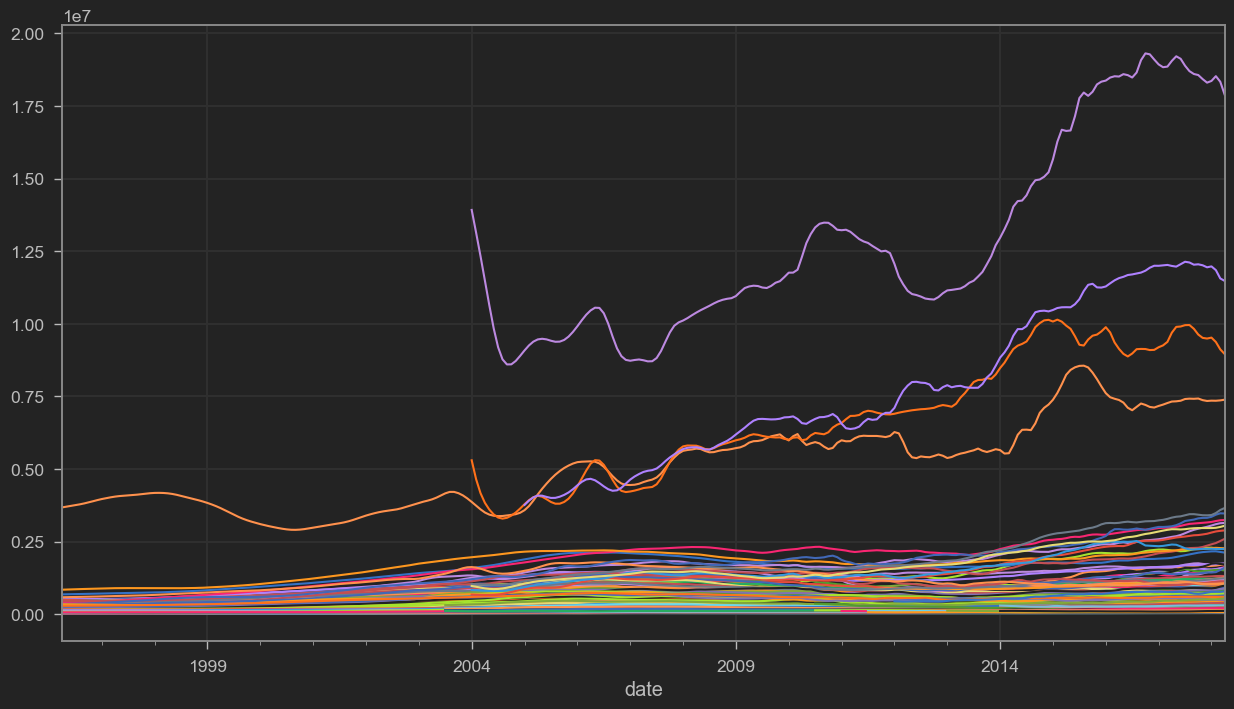

In [52]:
ts_df.plot(legend=0,figsize=(15,8))
plt.show()

<AxesSubplot:xlabel='date'>

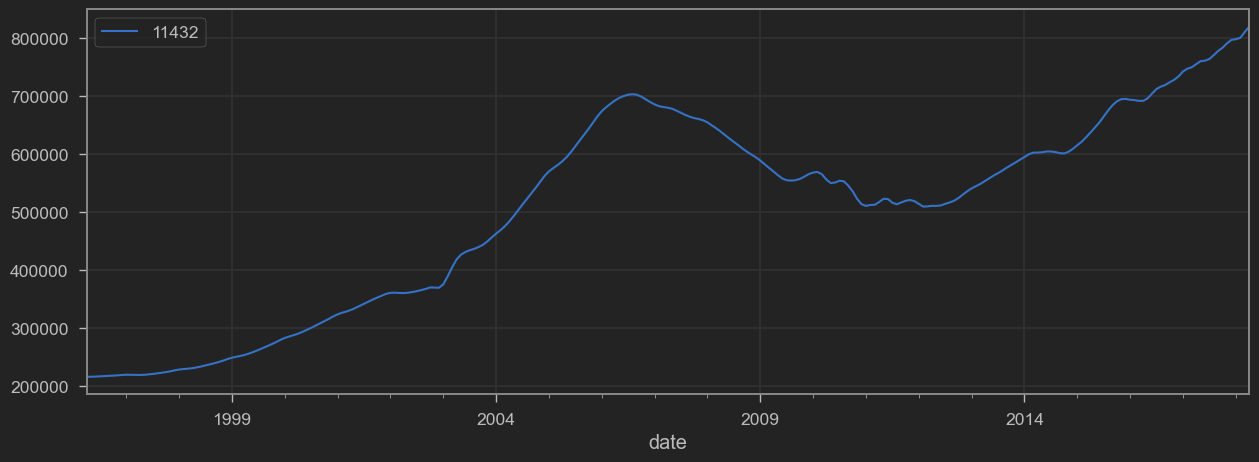

In [46]:
ts_df['11432'].plot(figsize=(15, 5), legend=1)

## Base MODEL

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from pandas.plotting import autocorrelation_plot, lag_plot

In [58]:
def plot_acf_pacf(ts, figsize=(10, 8), lags=24):

    fig, ax = plt.subplots(nrows=3, figsize=figsize)

    ## Plot ts
    ts.plot(ax=ax[0])

    ## Plot acf, pavf
    plot_acf(ts, ax=ax[1], lags=lags)
    plot_pacf(ts, ax=ax[2], lags=lags)
    fig.tight_layout()

    fig.suptitle(f"Zipcode: {ts.name}", y=1.1, fontsize=20)

    for a in ax[1:]:
        a.xaxis.set_major_locator(
            mpl.ticker.MaxNLocator(min_n_ticks=lags, integer=True))
        a.xaxis.grid()
    plt.show()
    return fig, ax

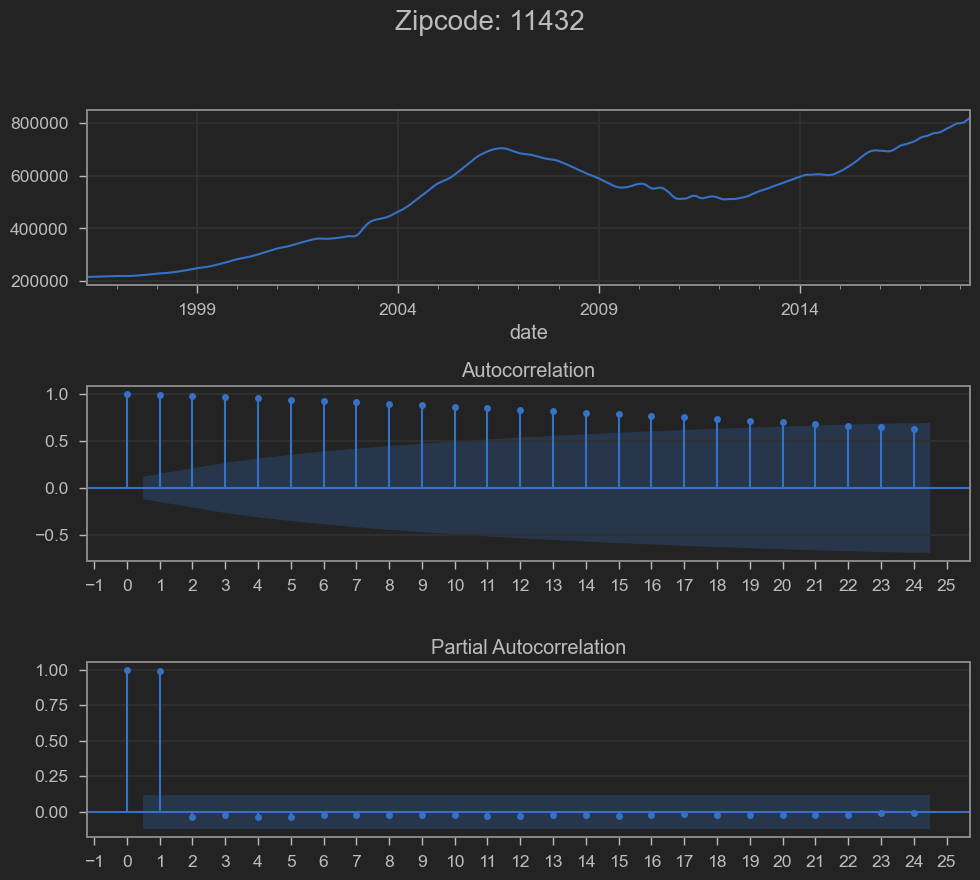

In [60]:
plot_acf_pacf(ts_df['11432']);

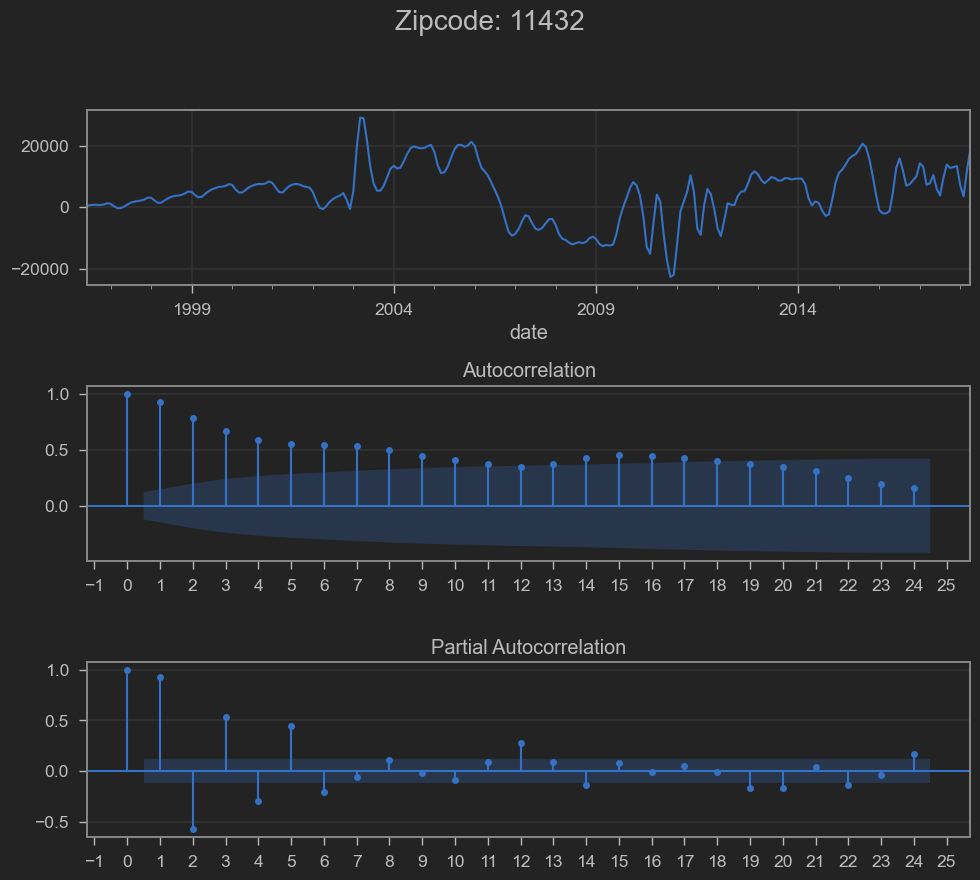

In [64]:
plot_acf_pacf(ts_df['11432'].diff(2).dropna());

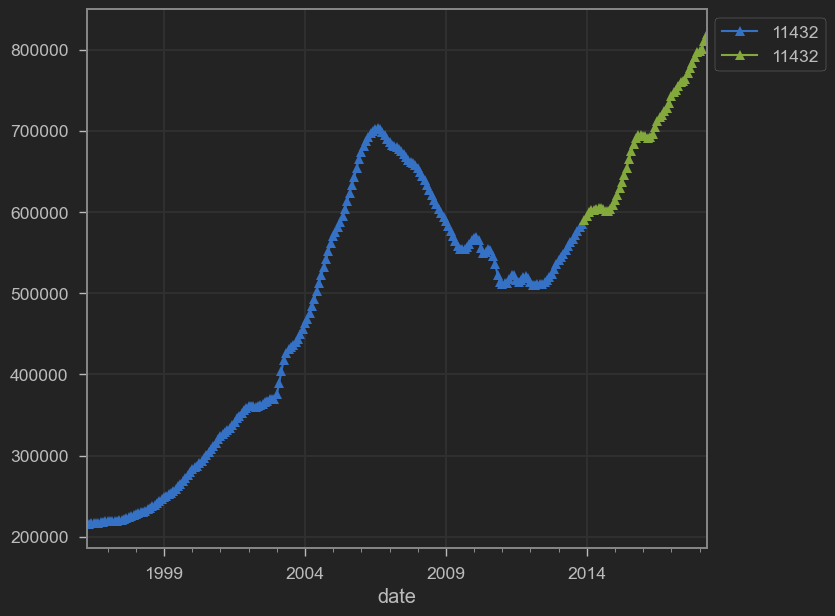

In [67]:
# train test split
train_size = 0.8
split_idx = round(len(ts_df['11432'])* train_size)
split_idx

## Split
train = ts_df['11432'].iloc[:split_idx]
test = ts_df['11432'].iloc[split_idx:]

## Visualize split
fig,ax= plt.subplots()
kws = dict(ax=ax,marker='^')
train.plot(**kws)
test.plot(**kws)
ax.legend(bbox_to_anchor=[1,1])
plt.show()

In [69]:
# selected params
d = 1
p = 1
q = 1

In [1]:
font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 2}
mpl.rc('font', **font)
# NOTE: if you visualizations are too cluttered to read, try calling 'plt.gcf().autofmt_xdate()'!

NameError: name 'mpl' is not defined

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  11432   No. Observations:                  212
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -2062.332
Date:                Sun, 13 Jun 2021   AIC                           4130.664
Time:                        01:04:06   BIC                           4140.720
Sample:                    04-01-1996   HQIC                          4134.729
                         - 11-01-2013                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9388      0.022     43.337      0.000       0.896       0.981
ma.L1         -0.8978      0.027    -33.776      0.000      -0.950      -0.846
sigma2       1.78e+07   2.43e-10   7.33e+16      0.000    1.78e+07    1.78e+07
===================================================================================
Ljung-Box (L1) (Q):                 165.99   Jarque-Bera (JB):                 1.68
Prob(Q):                              0.00   Prob(JB):                         0.43
Heteroskedasticity (H):               1.90   Skew:                            -0.13
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.35
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.06e+32. Standard errors may be unstable.
"""

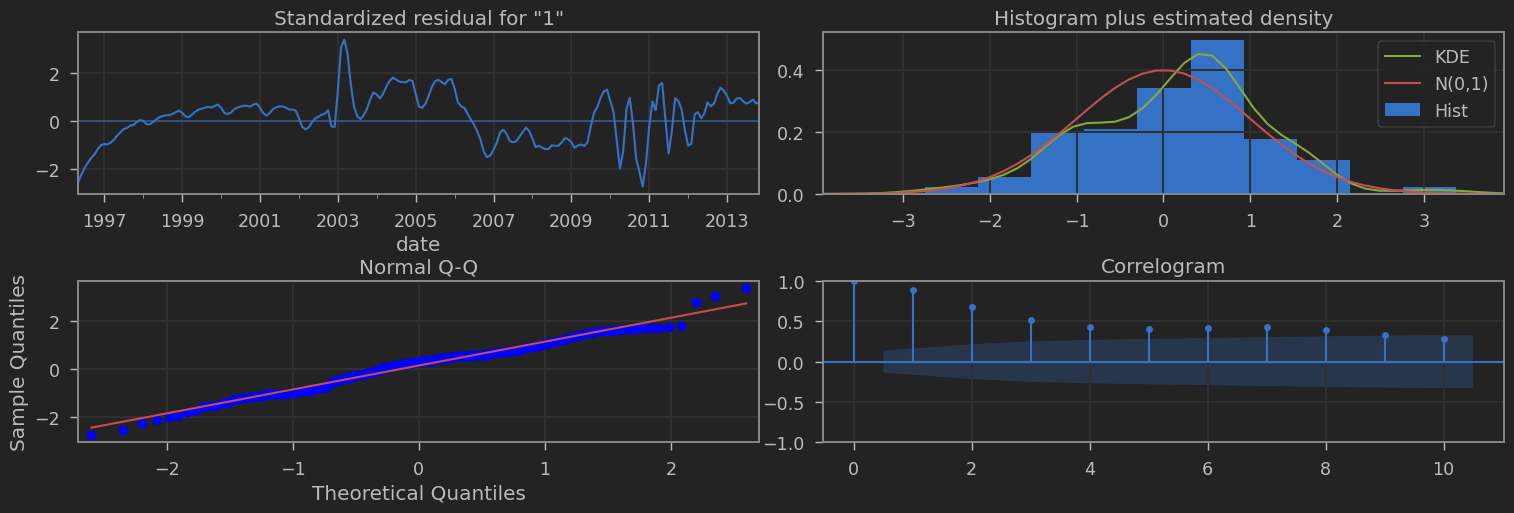

In [82]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

## Baseline model from eye-balled params
model = SARIMAX(train,order=(p,d,q),).fit()
display(model.summary())
model.plot_diagnostics(figsize=(15,5))
plt.tight_layout()
plt.show()

## pmdarima